In [1]:
from AShareReader import AShareReader
from CephClient import CephClient
import pandas as pd
import numpy as np
import math
import os

In [40]:
reader = AShareReader(dll_path = '{0}/ceph_client/ceph-client.so'.format(os.environ['HOME']), 
               config_path='{0}/dfs/ceph.conf'.format(os.environ['HOME']),
               KEYRING_LOC = '{0}/dfs/ceph.key.keyring'.format(os.environ['HOME']))

In [41]:
writer = CephClient(dll_path = '{0}/ceph_client/ceph-client.so'.format(os.environ['HOME']), 
               config_path='{0}/dfs/ceph.conf'.format(os.environ['HOME']),
               KEYRING_LOC = '{0}/dfs/ceph.key.keyring'.format(os.environ['HOME']))

client.marlowe


In [43]:
df = reader.Read_Stock_Daily('com_md_eq_cn','chnuniv_ic', univ='ic', start_date=20210301, end_date=20210302)
stock_list = df['skey'].to_list()[0:5]

In [9]:
stock_list

[1600006, 1600008, 1600021, 1600022, 1600026]

In [148]:
reader.Read_Stock_Daily('com_md_eq_cn','mdbar1d_jq', start_date=20210301, end_date=20210302, stock_list=stock_list)

,skey,date,time,name,trade_status,listed_days,open,high,low,close,...,marketValue,marketShares,totalShares,SW1_name,SW1_code,SW2_code,SW3_code,index_name,index_weight,exchange
7,1600006,20210301,180000000000,东风汽车,1,5126,6.90,7.09,6.82,7.09,...,1.418000e+10,2.000000e+09,2.000000e+09,申万汽车,SW801880,SW801094,SW850912,IC,0.098777,SSE
9,1600008,20210301,180000000000,首创股份,1,4957,2.94,2.98,2.93,2.94,...,2.158134e+10,7.340591e+09,7.340591e+09,申万公用事业,SW801160,SW801164,SW851621,IC,0.224399,SSE
20,1600021,20210301,180000000000,上海电力,1,4050,6.79,6.83,6.77,6.79,...,1.593780e+10,2.347246e+09,2.617164e+09,申万公用事业,SW801160,SW801161,SW851611,IC,0.123588,SSE
21,1600022,20210301,180000000000,山东钢铁,1,3713,1.43,1.57,1.43,1.57,...,1.718608e+10,1.094655e+10,1.094655e+10,申万钢铁,SW801040,SW801041,SW850411,IC,0.148611,SSE
24,1600026,20210301,180000000000,中远海能,1,4401,6.33,6.37,6.30,6.33,...,1.731909e+10,2.736033e+09,4.762692e+09,申万交通运输,SW801170,SW801176,SW851761,IC,0.152033,SSE
7,1600006,20210302,180000000000,东风汽车,1,5127,7.11,7.15,6.77,6.83,...,1.366000e+10,2.000000e+09,2.000000e+09,申万汽车,SW801880,SW801094,SW850912,IC,0.095970,SSE
9,1600008,20210302,180000000000,首创股份,1,4958,2.94,2.99,2.92,2.96,...,2.172815e+10,7.340591e+09,7.340591e+09,申万公用事业,SW801160,SW801164,SW851621,IC,0.227861,SSE
20,1600021,20210302,180000000000,上海电力,1,4051,6.80,7.47,6.80,7.46,...,1.751046e+10,2.347246e+09,2.617164e+09,申万公用事业,SW801160,SW801161,SW851611,IC,0.136947,SSE
21,1600022,20210302,180000000000,山东钢铁,1,3714,1.57,1.60,1.50,1.51,...,1.652929e+10,1.094655e+10,1.094655e+10,申万钢铁,SW801040,SW801041,SW850411,IC,0.144156,SSE
24,1600026,20210302,180000000000,中远海能,1,4402,6.36,6.36,6.20,6.25,...,1.710021e+10,2.736033e+09,4.762692e+09,申万交通运输,SW801170,SW801176,SW851761,IC,0.151398,SSE


In [15]:
df = reader.Read_Stock_Tick('com_md_eq_cn','md_index', start_date=20210301, end_date=20210302, stock_list=[1000300])

In [20]:
a = df.groupby("date")['close'].shift(1)

In [21]:
a.isna().sum()

2

In [22]:
df.groupby("date")['close'].shift(1).ffill().isna().sum()

1

In [33]:
reader.Read_Stock_Daily('com_md_eq_cn','chnuniv_amac', start_date=20210301, end_date=20210301)

,date,weight,skey,index_id,index_name
0,20210301,2.18,1600000,3011046,AMAC 金融
1,20210301,1.85,1600004,3011043,AMAC 交运
2,20210301,0.57,1600006,3030063,AMAC 汽车
3,20210301,0.25,1600007,3011047,AMAC 地产
4,20210301,2.00,1600008,3011041,AMAC 公用
...,...,...,...,...,...
4184,20210301,0.00,2300947,3030037,AMAC 商务
4185,20210301,0.00,2300948,3030039,AMAC 公共
4186,20210301,0.00,2300949,3030038,AMAC 科技
4187,20210301,0.00,2300951,3030066,AMAC 电子


In [46]:
skey = 2000001
date = 20200102
bench=1000300
database="com_md_eq_cn"

In [75]:
# read index data
ske = reader.Read_Stock_Tick(database, "md_index", start_date=date, end_date=date, stock_list=[bench])
ske = (ske.drop_duplicates(subset=["time"], keep="last")
          .rename(columns={"close": "indexClose"})
          .reset_index(drop=True))

# read industry data
amacStock = reader.Read_Stock_Daily(database, 'chnuniv_amac', start_date=date, end_date=date)
indus_id = amacStock.loc[amacStock.skey==skey, "index_id"].item()
amacData = reader.Read_Stock_Tick(database, "md_index", start_date=date, end_date=date, 
                                  stock_list=[indus_id])
amacData = (amacData.drop_duplicates(subset=['time'], keep='last')
                    .sort_values(['skey', 'time'])
                    .rename(columns={"close": "industryClose"})
                    .reset_index(drop=True))

# read stock tick data
tstock = reader.Read_Stock_Tick(database, "md_snapshot_l2", start_date=date, end_date=date, stock_list=[skey])

tstock = tstock[((tstock.bid1p != 0) | (tstock.ask1p != 0))].reset_index(drop=True)

if (tstock.shape[0] == 0):
    print('%s has no data'%skey)

tstock['session'] = np.where(tstock['time'] < 13 * 1e10, 0, 1)

tstock = tstock[(tstock['time'] >= 9.3 * 1e10) & 
                (tstock['time'] < 14.5655 * 1e10)].reset_index(drop=True)

In [76]:
# merge industry close and index close
tstock = (tstock.merge(ske[["time", "indexClose"]], on=["time"], how="left", validate="one_to_one")
                    .merge(amacData[["time", "industryClose"]], on=["time"], how="left", validate="one_to_one"))
tstock[["indexClose", "industryClose"]] = tstock[["indexClose", "industryClose"]].shift(1).ffill()

In [73]:
tstock.time.count()

4829

In [78]:
tstock.shape

(4829, 195)

In [61]:
tstock.columns

Index(['skey', 'date', 'time', 'clockAtArrival', 'ordering', 'has_missing',
       'cum_trades_cnt', 'cum_volume', 'cum_amount', 'prev_close',
       ...
       'cum_canceled_buy_orders', 'cum_canceled_buy_volume',
       'cum_canceled_buy_amount', 'cum_canceled_sell_orders',
       'cum_canceled_sell_volume', 'cum_canceled_sell_amount', 'ApplSeqNum',
       'BizIndex', 'session', 'indus_id'],
      dtype='object', length=194)

In [35]:
('%s has no data'%skey)

'30202 has no data'

In [77]:
tstock[tstock.time > 9.4e10]

,skey,date,time,clockAtArrival,ordering,has_missing,cum_trades_cnt,cum_volume,cum_amount,prev_close,...,cum_canceled_buy_volume,cum_canceled_buy_amount,cum_canceled_sell_orders,cum_canceled_sell_volume,cum_canceled_sell_amount,ApplSeqNum,BizIndex,session,indexClose,industryClose
201,2000001,20200102,94003000000,1577929203000000,320,0,13683,43820736,7.355813e+08,16.45,...,0,0.0,0,0,0.0,2375574,-1,0,4132.0717,3467.4164
202,2000001,20200102,94006000000,1577929206000000,321,0,13737,43915636,7.371743e+08,16.45,...,0,0.0,0,0,0.0,2383834,-1,0,4132.1422,3466.7137
203,2000001,20200102,94009000000,1577929209000000,322,0,13765,43928736,7.373942e+08,16.45,...,0,0.0,0,0,0.0,2391706,-1,0,4132.1422,3466.8425
204,2000001,20200102,94012000000,1577929212000000,323,0,13810,44036536,7.392025e+08,16.45,...,0,0.0,0,0,0.0,2398333,-1,0,4132.7243,3466.8425
205,2000001,20200102,94015000000,1577929215000000,324,0,13825,44076336,7.398703e+08,16.45,...,0,0.0,0,0,0.0,2405293,-1,0,4132.7243,3467.4228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,2000001,20200102,145642000000,1577948202000000,4943,0,67161,152108003,2.555758e+09,16.45,...,0,0.0,0,0,0.0,17563728,-1,1,4151.8429,3460.4249
4825,2000001,20200102,145645000000,1577948205000000,4944,0,67171,152113003,2.555842e+09,16.45,...,0,0.0,0,0,0.0,17569404,-1,1,4151.8429,3460.4249
4826,2000001,20200102,145648000000,1577948208000000,4945,0,67188,152158103,2.556603e+09,16.45,...,0,0.0,0,0,0.0,17573943,-1,1,4152.1270,3460.8555
4827,2000001,20200102,145651000000,1577948211000000,4946,0,67198,152167303,2.556758e+09,16.45,...,0,0.0,0,0,0.0,17578842,-1,1,4152.3087,3460.8555


In [85]:
tstock.date.astype(str) + " " + (tstock.time / 1e6).astype(str)

0        20200102 93000.0
1        20200102 93003.0
2        20200102 93006.0
3        20200102 93009.0
4        20200102 93012.0
              ...        
4824    20200102 145642.0
4825    20200102 145645.0
4826    20200102 145648.0
4827    20200102 145651.0
4828    20200102 145654.0
Length: 4829, dtype: object

In [87]:
tstock.date.astype(str).apply(lambda x: x[:4] + "-" + x[4:6] + "-" + x[6:])

0       2020-01-02
1       2020-01-02
2       2020-01-02
3       2020-01-02
4       2020-01-02
           ...    
4824    2020-01-02
4825    2020-01-02
4826    2020-01-02
4827    2020-01-02
4828    2020-01-02
Name: date, Length: 4829, dtype: object

In [98]:
pd.DatetimeIndex(tstock.date.astype(str).apply(lambda x: x[:4] + "-" + x[4:6] + "-" + x[6:]) + " " + 
               (tstock.time).astype(str).str.zfill(12).apply(lambda x: x[:2] + ":" + x[2:4] + ":" + x[4:6]))

DatetimeIndex(['2020-01-02 09:30:00', '2020-01-02 09:30:03',
               '2020-01-02 09:30:06', '2020-01-02 09:30:09',
               '2020-01-02 09:30:12', '2020-01-02 09:30:15',
               '2020-01-02 09:30:18', '2020-01-02 09:30:21',
               '2020-01-02 09:30:24', '2020-01-02 09:30:27',
               ...
               '2020-01-02 14:56:27', '2020-01-02 14:56:30',
               '2020-01-02 14:56:33', '2020-01-02 14:56:36',
               '2020-01-02 14:56:39', '2020-01-02 14:56:42',
               '2020-01-02 14:56:45', '2020-01-02 14:56:48',
               '2020-01-02 14:56:51', '2020-01-02 14:56:54'],
              dtype='datetime64[ns]', length=4829, freq=None)

In [100]:
writer.list_dir("/personal_pool/marlowe", "marlowe","")

['/personal_pool/marlowe/MayaFutures']

In [108]:
skey

2000001

In [109]:
reader.Read_Stock_Daily(database, 'chnuniv_amac', start_date=20190101, end_date=20200430, stock_list=[skey])

,date,weight,skey,index_id,index_name
1532,20190102,2.35,2000001,3011046,AMAC 金融
1532,20190103,2.35,2000001,3011046,AMAC 金融
1532,20190104,2.48,2000001,3011046,AMAC 金融
1532,20190107,2.48,2000001,3011046,AMAC 金融
1532,20190108,2.47,2000001,3011046,AMAC 金融
...,...,...,...,...,...
1628,20200424,3.03,2000001,3011046,AMAC 金融
1629,20200427,3.05,2000001,3011046,AMAC 金融
1629,20200428,3.03,2000001,3011046,AMAC 金融
1630,20200429,3.09,2000001,3011046,AMAC 金融


In [106]:
daily = reader.Read_Stock_Daily(database, 'mdbar1d_jq', 20190101, 20200430, cols_list=['skey', 'date', 'trade_status'])

In [111]:
writer.get_file_size("/personal_pool/marlowe/staone_research/feature/20200102/2000001.pkl", "marlowe", "") / 1e6

2.088287

In [113]:
3 * 3000 * 400 / 1024

3515.625

In [117]:
a = reader.Read_Stock_Daily(database, 'chnuniv_ih', 20190902, 20190902).skey.unique()

In [141]:
tmp = reader.Read_Stock_Daily(database, 'mdbar1d_jq', 20190830, 20191231, stock_list=[skey], cols_list=['skey', 'date', 'trade_status'])

In [142]:
tmp[tmp.trade_status==0]

,skey,date,trade_status


In [158]:
tmp = reader.Read_Stock_Daily(database, 'chnuniv_amac', 20190902, 20200902, stock_list=[skey])

In [160]:
tmp.index_name.unique()

array(['AMAC 金融'], dtype=object)

In [ ]:
# reader.Read_Stock_Daily(database, "md_snapshot_l2", start_date=20191030, end_date=20191030, stock_list=[1600030])

In [169]:
tmp

,date,weight,skey,index_id,index_name
1560,20190902,2.80,2000001,3011046,AMAC 金融
1560,20190903,2.77,2000001,3011046,AMAC 金融
1560,20190904,2.76,2000001,3011046,AMAC 金融
1560,20190905,2.74,2000001,3011046,AMAC 金融
1561,20190906,2.76,2000001,3011046,AMAC 金融
...,...,...,...,...,...
1695,20200827,2.71,2000001,3011046,AMAC 金融
1698,20200828,2.77,2000001,3011046,AMAC 金融
1699,20200831,2.79,2000001,3011046,AMAC 金融
1700,20200901,2.79,2000001,3011046,AMAC 金融


In [218]:
skey = 2000001
start_date = 20200102
end_date = 20200310
bench=1000300
database="com_md_eq_cn"

In [219]:
database = "com_md_eq_cn"

# read index data
ske = reader.Read_Stock_Tick(database, "md_index", start_date=start_date, end_date=end_date, stock_list=[bench])
ske = (ske.drop_duplicates(subset=["date", "time"], keep="last")
        .rename(columns={"close": "indexClose"})
        .reset_index(drop=True))

# read industry data
amacStock = reader.Read_Stock_Daily(database, 'chnuniv_amac', start_date=start_date, end_date=end_date, stock_list=[skey])
amacStock = amacStock.sort_values("date").rename(columns={"index_id": "AMACCode"}).reset_index(drop=True)
amacStock['tradeConsDay'] = amacStock.index.values

indus_id = amacStock["AMACCode"].unique()
amacData = reader.Read_Stock_Tick(database, "md_index", start_date=start_date, end_date=end_date, 
                                stock_list=indus_id)
amacData = (amacData.drop_duplicates(subset=['date', 'time'], keep='last')
                    .sort_values(['skey', 'time'])
                    .rename(columns={"skey": "AMACCode", "close": "industryClose"})
                    .reset_index(drop=True))

# read stock tick data
try:
    tstock = reader.Read_Stock_Tick(database, "md_snapshot_l2", start_date=start_date, end_date=end_date, stock_list=[skey])
except:
    print('%s has no data'%skey)
    

tstock = tstock[((tstock.bid1p != 0) | (tstock.ask1p != 0))].reset_index(drop=True)

if (tstock.shape[0] == 0):
    print('%s has no data'%skey)
    

tstock['session'] = np.where(tstock['time'] < 13 * 1e10, 0, 1)

tstock = tstock[(tstock['time'] >= 9.3 * 1e10) & 
                (tstock['time'] < 14.5655 * 1e10)].reset_index(drop=True)

# merge industry close and index close
tstock = tstock.merge(amacStock[['date', 'AMACCode', 'tradeConsDay']], how='left', on=['date'], validate="many_to_one")

tstock = (tstock.merge(ske[["date", "time", "indexClose"]], on=["date", "time"], how="left", validate="one_to_one")
                .merge(amacData[["date", "time", 'AMACCode', "industryClose"]], on=["date", "time", "AMACCode"], how="left", validate="one_to_one"))
tstock[["indexClose", "industryClose"]] = tstock[["indexClose", "industryClose"]].shift(1).ffill()
del amacStock, amacData, ske

groupAllData = tstock.groupby(['date'])
tstock['curNearLimit'] = np.where((tstock.ask5q == 0) | (tstock.bid5q == 0), 1.0, 0.0)
tstock['curNearLimit_L1'] = groupAllData['curNearLimit'].shift(1)
tstock['dailyCount'] = groupAllData['time'].transform('count')
tstock['nearLimitCount'] = groupAllData['curNearLimit'].transform('sum')
dateInfo = groupAllData[['dailyCount', 'nearLimitCount', 'tradeConsDay']].mean().reset_index()
del groupAllData
dateInfo['useFlag'] = np.where(dateInfo['nearLimitCount']*2 < dateInfo['dailyCount'], 1, 0)
dateInfo['useConsDay'] = dateInfo['useFlag'].cumsum()
tstock = pd.merge(tstock, dateInfo[['date', 'tradeConsDay', 'useFlag', 'useConsDay']],
                  how='left', on=['date', 'tradeConsDay'], validate='many_to_one') 

In [199]:
tstock.groupby("date", as_index=False).cum_amount.mean()

,date,cum_amount
0,20200102,1.890253e+09
1,20200103,1.138801e+09
2,20200106,8.372393e+08
3,20200107,7.077928e+08
4,20200108,7.842950e+08
5,20200109,9.557334e+08
6,20200110,5.648289e+08


In [220]:
dateInfo = tstock.groupby('date', as_index=False)[['tradeConsDay', 'useConsDay']].first()
dateInfo['date'] = pd.to_datetime(dateInfo.date.astype(str))

In [221]:
dateInfo

,date,tradeConsDay,useConsDay
0,2020-01-02,0,1
1,2020-01-03,1,2
2,2020-01-06,2,3
3,2020-01-07,3,4
4,2020-01-08,4,5
5,2020-01-09,5,6
6,2020-01-10,6,7
7,2020-01-13,7,8
8,2020-01-14,8,9
9,2020-01-15,9,10


In [256]:
dateInfo['week'] = dateInfo['date'].dt.isocalendar().week
dateInfo['weekChange'] = dateInfo['week'].diff(1).fillna(1)
dateInfo['weekChange'] = np.where(dateInfo['weekChange'] != 0, 1, 0)
dateInfo.loc[0, 'weekChange'] = 1
dateInfo['week'] = dateInfo['weekChange'].cumsum()
dateInfo['lastWeekday'] = dateInfo['week'].diff(-1)
dateInfo['lastWeekday'] = dateInfo['lastWeekday'].fillna(-1)
maxTradeConsDay = dateInfo['tradeConsDay'].max()

In [257]:
weekInterval = 1
regWindowSize = 20

In [258]:
lastTradeDays = (dateInfo[dateInfo['lastWeekday'] != 0].tradeConsDay).unique()
lastTradeDays = lastTradeDays[(lastTradeDays > regWindowSize) & (lastTradeDays < maxTradeConsDay)][::weekInterval]

In [265]:
trainEndUseConsDays = dateInfo[dateInfo.tradeConsDay.isin(lastTradeDays - 1)].useConsDay.values
trainStartUseConsDays = np.maximum(trainEndUseConsDays - 20 + 1, 1)
testStartUseConsDays = dateInfo[dateInfo.tradeConsDay.isin(lastTradeDays + 1)].useConsDay.values
testEndUseConsDays = np.append(dateInfo[dateInfo.tradeConsDay.isin(lastTradeDays[1:])].useConsDay.values, dateInfo['useConsDay'].max())

In [266]:
trainEndUseConsDays

array([25, 30, 35, 40])

In [267]:
trainStartUseConsDays

array([ 6, 11, 16, 21])

In [268]:
testStartUseConsDays

array([27, 32, 37, 42])

In [269]:
testEndUseConsDays

array([31, 36, 41, 43])

In [271]:
list(zip(trainEndUseConsDays, trainStartUseConsDays,
                                      testStartUseConsDays, testEndUseConsDays))

[(25, 6, 27, 31), (30, 11, 32, 36), (35, 16, 37, 41), (40, 21, 42, 43)]

In [499]:
writer.read_file("/sta_alpha_eq_cn/sta_90_1_1_1_l2/IC/sta20200102.parquet", "sta_alpha_eq_cn", "sta_90_1_1_1_l2")

,skey,date,ordering,yHatBuy,yHatSell
0,1600006,20200102,97,-0.000547,-0.001604
1,1600006,20200102,98,-0.001559,-0.000589
2,1600006,20200102,99,-0.000918,-0.001234
3,1600006,20200102,100,-0.001024,-0.001127
4,1600006,20200102,101,-0.001115,-0.001035
...,...,...,...,...,...
2782303,2300699,20200102,4655,-0.000719,0.000510
2782304,2300699,20200102,4656,0.000039,-0.001097
2782305,2300699,20200102,4657,0.000401,-0.000822
2782306,2300699,20200102,4658,0.000179,-0.000601


In [2]:
date = 20200102
sta = 'sta_90_1_1_1_l2'
bench = "IC"

a = AShareReader(dll_path = '{0}/ceph_client/ceph-client.so'.format(os.environ['HOME']), 
               config_path='{0}/dfs/ceph.conf'.format(os.environ['HOME']),
               KEYRING_LOC = '{0}/dfs/ceph.key.keyring'.format(os.environ['HOME']))
c = CephClient(dll_path = '{0}/ceph_client/ceph-client.so'.format(os.environ['HOME']), 
               config_path='{0}/dfs/ceph.conf'.format(os.environ['HOME']),
               KEYRING_LOC = '{0}/dfs/ceph.key.keyring'.format(os.environ['HOME']))

client.marlowe


In [17]:
def _get_eva_md(tstock, forward_period, backward_period):
    tstock['index'] = tstock.index.values
    tstock['session'] = np.where(tstock['time'] < 13 * 1e10, 0, 1)

    assert not ((tstock.bid1p == 0) & (tstock.ask1p == 0)).any()
    tstock['safeBid1p'] = np.where(tstock.bid1p == 0, tstock.ask1p, tstock.bid1p)
    tstock['safeAsk1p'] = np.where(tstock.ask1p == 0, tstock.bid1p, tstock.ask1p)
    tstock['mid'] = (tstock.safeBid1p + tstock.safeAsk1p)/2
    assert (tstock['mid'] != 0).all()
    tstock['adjMid'] = (tstock.bid1q * tstock.safeAsk1p + tstock.ask1q * tstock.safeBid1p)/(tstock.bid1q + tstock.ask1q)

    groupAllData = tstock.groupby(['date', 'skey', 'session'])
    tstock['sessionStartIx'] = groupAllData['index'].transform('min')

    # FIXME: change to clockAtExchange in the future version of DFS
    for tm in [backward_period]:
        tmCol = 'L{}s_ix'.format(tm)
        tstock[tmCol] = groupAllData['clockAtArrival'].transform(lambda x: findTmValue(x, tm * 1e6, 'L')).astype(int)
    
    for tm in [forward_period]:
        tmCol = 'F{}s_ix'.format(tm)
        tstock[tmCol] = groupAllData['clockAtArrival'].transform(lambda x: findTmValue(x, tm * 1e6, 'F')).astype(int)

    for tm in [forward_period]:
        tmIx = tstock['F{}s_ix'.format(tm)].values + tstock['sessionStartIx'].values
        nanMask = tstock['F{}s_ix'.format(tm)].values == -1
        for col in ['adjMid']:
            targetCol = tstock[col].values[tmIx]
            targetCol[nanMask] = np.nan
            tstock['{}_F{}s'.format(col, tm)] = targetCol
    
    tstock['curNearLimit'] = np.where((tstock.ask5q == 0) | (tstock.bid5q == 0), 1.0, 0.0)
    
    tstock[f'buyRet{forward_period}s'] = (np.where(tstock.curNearLimit == 1, np.NaN, tstock[f'adjMid_F{forward_period}s'] / tstock.ask1p - 1)).clip(-.03,.03)
    tstock[f'sellRet{forward_period}s'] = (np.where(tstock.curNearLimit == 1, np.NaN, tstock.bid1p / tstock[f'adjMid_F{forward_period}s'] - 1)).clip(-.03,.03)

    for tm in [backward_period]:
        tmIx = tstock['L{}s_ix'.format(tm)].values + tstock['sessionStartIx'].values
        nanMask = tstock['L{}s_ix'.format(tm)].values == -1
        for col in ['curNearLimit']:
            targetCol = tstock[col].values[tmIx]
            targetCol[nanMask] = np.nan
            tstock['{}_L{}s'.format(col, tm)] = targetCol  

     # nearLimit == 1 if any nearLimit in past
    tstock.set_index(pd.DatetimeIndex(tstock['datetime']), inplace = True)

    tstock[f'nearLimit_L{backward_period}s_L0'] = (groupAllData['curNearLimit'].apply(lambda x:x.rolling(window = f'{backward_period}s', closed='both').max())) 
    tstock['nearLimit'] = (tstock[f'nearLimit_L{backward_period}s_L0'] == 1) | (tstock[f'curNearLimit_L{backward_period}s'] == 1)
    
    tstock.reset_index(drop=True, inplace=True)
    tstock.loc[tstock['nearLimit'], [f'buyRet{forward_period}s', f'sellRet{forward_period}s']] = np.nan

    col_ls = ['skey', 'date', 'time', 'datetime', 'ordering', 
              'ask1p', 'ask1q', 'bid1p', 'bid1q',
              f'buyRet{forward_period}s', f'sellRet{forward_period}s', 'nearLimit',
              'cum_volume', 'cum_amount']

    return tstock[col_ls]

def findTmValue(clockLs, tm, method='L'):
    maxIx = len(clockLs)
    orignIx = np.arange(maxIx)
    if method == 'F':
        ix = np.searchsorted(clockLs, clockLs + tm, side='left')
        ## if target future index is next tick, mask
        mask = (orignIx == ix)|(ix == maxIx)
    elif method == 'L':
        ## if target future index is last tick, mask
        ix = np.searchsorted(clockLs, clockLs - tm, side='right') - 1
        ix = ix - 1
        ix[ix<0] = 0
        mask = (orignIx == ix) | ((clockLs-tm).values < clockLs.values[0])
    ix[mask] = -1
    return ix

In [19]:
df_sta = c.read_file(f"/sta_alpha_eq_cn/{sta}/IC/sta{date}.parquet", "sta_alpha_eq_cn", sta)
df_sta = df_sta.rename(columns={"yHatBuy": f"yHatBuy_{sta[4:]}", "yHatSell": f"yHatSell_{sta[4:]}"})

In [20]:
universe = a.Read_Stock_Daily('com_md_eq_cn', f"chnuniv_{bench.lower()}", date, date).skey.unique()
df_sta = df_sta[df_sta.skey.isin(universe)].reset_index(drop=True)

In [43]:
# TODO: no need to read ask5q and bid5q if we have near limit status in DFS
df_md = a.Read_Stock_Tick('com_md_eq_cn', 'md_snapshot_l2', start_date=date, end_date=date, 
                       stock_list=universe, cols_list=['skey', 'date', 'time', 'ordering', 
                                                       'ask1p', 'ask1q', 'bid1p', 'bid1q', 'ask5q', 'bid5q',
                                                       'cum_volume', 'cum_amount', 'clockAtArrival', 'ApplSeqNum'])

In [44]:
perc = [0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]

In [46]:
df_md.groupby(['skey', 'date'])['cum_volume'].diff().describe(percentiles=perc)

count    2.357254e+06
mean     6.189168e+03
std      3.474349e+04
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      5.000000e+02
75%      3.200000e+03
90%      1.210000e+04
95%      2.500000e+04
99%      9.270000e+04
max      1.074527e+07
Name: cum_volume, dtype: float64

In [42]:
df_md.groupby('skey').ordering.count()

skey
2000006     14235
2000008     21724
2000009    123175
2000012     25517
2000021     86922
            ...  
2300376      7137
2300383     49385
2300418     64063
2300459     54084
2300529     19685
Name: ordering, Length: 250, dtype: int64

In [22]:
tmp = a.Read_Stock_Tick('com_md_eq_cn', f'md_snapshot_l2', start_date=date, end_date=date, 
                         stock_list=universe, cols_list=['skey', 'date','ApplSeqNum'])

In [168]:
df_md = df_md[df_md.ApplSeqNum >= 0]
tmp = tmp[tmp.ApplSeqNum >= 0]
df_md = pd.merge(tmp, df_md, how='left', on=['skey', 'date','ApplSeqNum'], validate='many_to_one')

In [169]:
df_md = df_md.sort_values(['skey', 'time'])

In [142]:
df_md[(df_md.skey==2000006) & (df_md.ApplSeqNum==1489594)]

,skey,date,time,ordering,ask1p,ask1q,bid1p,bid1q,ask5q,bid5q,cum_volume,cum_amount,clockAtArrival,ApplSeqNum
796983,2000006,20200203,93418000000,183,4.57,3224635,0.0,0,21600,0,1044700,4774279.0,1580693658000000,1489594
796986,2000006,20200203,93430000000,186,4.57,3224635,0.0,0,21600,0,1044700,4774279.0,1580693670000000,1489594


In [23]:
df_md = df_md[(df_md.bid1p != 0) | (df_md.ask1p != 0)]
df_md = df_md[(df_md['time'] >= 9.3 * 1e10) & 
              (df_md['time'] < 14.5655 * 1e10)].reset_index(drop=True)

In [171]:
df_md.head()

,skey,date,ApplSeqNum,time,ordering,ask1p,ask1q,bid1p,bid1q,ask5q,bid5q,cum_volume,cum_amount,clockAtArrival
0,2000006,20200203,538492,9.300013e+10,11.0,4.57,3307235.0,0.0,0.0,21600.0,0.0,397700.0,1817489.0,1.580693e+15
1,2000006,20200203,683850,9.300310e+10,74.0,4.57,3199635.0,0.0,0.0,21600.0,0.0,492700.0,2251639.0,1.580693e+15
2,2000006,20200203,772562,9.300607e+10,115.0,4.57,3223435.0,0.0,0.0,21600.0,0.0,544100.0,2486537.0,1.580693e+15
3,2000006,20200203,825492,9.300909e+10,140.0,4.57,3128435.0,0.0,0.0,21600.0,0.0,559700.0,2557829.0,1.580693e+15
4,2000006,20200203,857908,9.301203e+10,166.0,4.57,3147935.0,0.0,0.0,21600.0,0.0,573900.0,2622723.0,1.580693e+15


In [24]:
df_md['datetime'] = (df_md.date.astype(str).apply(lambda x: x[:4] + "-" + x[4:6] + "-" + x[6:]) + " " + 
                     df_md.time.astype(int).astype(str).str.zfill(12).apply(lambda x: x[:2] + ":" + x[2:4] + ":" + x[4:6]))
df_md['datetime'] = pd.to_datetime(df_md['datetime'])

In [173]:
df_md[df_md['datetime'].shift(1) > df_md['datetime']]

,skey,date,ApplSeqNum,time,ordering,ask1p,ask1q,bid1p,bid1q,ask5q,bid5q,cum_volume,cum_amount,clockAtArrival,datetime
1734,2000008,20200203,599897,9.300014e+10,7.0,3.08,11008525.0,0.0,0.0,3000.0,0.0,1156000.0,3560480.00,1.580693e+15,2020-02-03 09:30:00
4678,2000009,20200203,597660,9.300014e+10,46.0,5.83,8516291.0,0.0,0.0,1000.0,0.0,2874600.0,16758918.00,1.580693e+15,2020-02-03 09:30:00
8741,2000012,20200203,571869,9.300013e+10,24.0,4.14,3295782.0,0.0,0.0,29300.0,0.0,977300.0,4046022.00,1.580693e+15,2020-02-03 09:30:00
10930,2000021,20200203,597855,9.300014e+10,45.0,13.42,17830386.0,0.0,0.0,1000.0,0.0,855000.0,11474100.00,1.580693e+15,2020-02-03 09:30:00
14836,2000025,20200203,596514,9.300013e+10,11.0,18.04,1122970.0,0.0,0.0,50865.0,0.0,44900.0,809996.00,1.580693e+15,2020-02-03 09:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788796,2300376,20200203,689954,9.300139e+10,53.0,4.37,2084505.0,0.0,0.0,10000.0,0.0,433900.0,1896143.00,1.580693e+15,2020-02-03 09:30:01
790512,2300383,20200203,695068,9.300149e+10,284.0,19.08,2178041.0,0.0,0.0,200.0,0.0,3321900.0,63381852.00,1.580693e+15,2020-02-03 09:30:01
794927,2300418,20200203,659385,9.300149e+10,753.0,18.60,3642.0,18.5,259800.0,94700.0,400.0,4456500.0,83252154.56,1.580693e+15,2020-02-03 09:30:01
799754,2300459,20200203,694871,9.300148e+10,311.0,2.99,13642223.0,0.0,0.0,55100.0,0.0,11655600.0,34850244.00,1.580693e+15,2020-02-03 09:30:01


In [165]:
tmp[(tmp.skey==2000006) & (tmp.ApplSeqNum==1489594)]

,skey,date,ApplSeqNum
13473,2000006,20200203,1489594
13476,2000006,20200203,1489594


In [162]:
df_md[(df_md.skey==2000006) & (df_md.time >=9.3410e10)]

,skey,date,ApplSeqNum,time,ordering,ask1p,ask1q,bid1p,bid1q,ask5q,...,mid,adjMid,sessionStartIx,L180s_ix,F90s_ix,adjMid_F90s,curNearLimit,buyRet90s,sellRet90s,curNearLimit_L180s
datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-03 09:34:14,2000006,20200203,1487047,9.341424e+10,409.0,4.57,3185235.0,0.0,0.0,21600.0,...,4.57,4.57,0,24,103,4.57,1.0,NaN,NaN,1.0
2020-02-03 09:34:15,2000006,20200203,1489594,9.341555e+10,411.0,4.57,3224635.0,0.0,0.0,21600.0,...,4.57,4.57,0,24,103,4.57,1.0,NaN,NaN,1.0
2020-02-03 09:34:18,2000006,20200203,1496226,9.341879e+10,412.0,4.57,3225635.0,0.0,0.0,21600.0,...,4.57,4.57,0,25,103,4.57,1.0,NaN,NaN,1.0
2020-02-03 09:34:26,2000006,20200203,1512443,9.342686e+10,414.0,4.57,3211635.0,0.0,0.0,21600.0,...,4.57,4.57,0,28,106,4.57,1.0,NaN,NaN,1.0
2020-02-03 09:34:15,2000006,20200203,1489594,9.341555e+10,411.0,4.57,3224635.0,0.0,0.0,21600.0,...,4.57,4.57,0,24,103,4.57,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03 14:56:08,2000006,20200203,7614791,1.456090e+11,3210.0,4.57,6643899.0,0.0,0.0,2500.0,...,4.57,4.57,1189,516,-1,NaN,1.0,NaN,NaN,1.0
2020-02-03 14:56:26,2000006,20200203,7621874,1.456261e+11,3211.0,4.57,6650199.0,0.0,0.0,2500.0,...,4.57,4.57,1189,517,-1,NaN,1.0,NaN,NaN,1.0
2020-02-03 14:56:30,2000006,20200203,7623706,1.456306e+11,3212.0,4.57,6649699.0,0.0,0.0,2500.0,...,4.57,4.57,1189,518,-1,NaN,1.0,NaN,NaN,1.0


In [25]:
# TODO: modify this when true return and near limit status is ready in DFS
df_md = _get_eva_md(df_md, 90, 180)

In [26]:
df_md.loc[df_md.nearLimit]

,skey,date,time,datetime,ordering,ask1p,ask1q,bid1p,bid1q,buyRet90s,sellRet90s,nearLimit,cum_volume,cum_amount
74918,2000009,20200102,1.008422e+11,2020-01-02 10:08:42,38961.0,6.78,348020.0,6.77,14180.0,NaN,NaN,True,99567563.0,6.347519e+08
74919,2000009,20200102,1.008422e+11,2020-01-02 10:08:42,38962.0,6.78,348020.0,6.77,14180.0,NaN,NaN,True,99567563.0,6.347519e+08
74920,2000009,20200102,1.008423e+11,2020-01-02 10:08:42,38963.0,6.78,348020.0,6.77,14180.0,NaN,NaN,True,99567563.0,6.347519e+08
74921,2000009,20200102,1.008423e+11,2020-01-02 10:08:42,38964.0,6.78,348020.0,6.77,14180.0,NaN,NaN,True,99567563.0,6.347519e+08
74922,2000009,20200102,1.008423e+11,2020-01-02 10:08:42,38965.0,6.78,348020.0,6.77,14080.0,NaN,NaN,True,99567663.0,6.347526e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7841286,2300315,20200102,1.118259e+11,2020-01-02 11:18:25,62242.0,6.75,156300.0,6.74,3600.0,NaN,NaN,True,126073233.0,8.316518e+08
7841287,2300315,20200102,1.118262e+11,2020-01-02 11:18:26,62243.0,6.75,136300.0,6.74,3600.0,NaN,NaN,True,126093233.0,8.317868e+08
7841288,2300315,20200102,1.118265e+11,2020-01-02 11:18:26,62244.0,6.75,136300.0,6.74,3600.0,NaN,NaN,True,126093233.0,8.317868e+08
7841289,2300315,20200102,1.118268e+11,2020-01-02 11:18:26,62245.0,6.75,136300.0,6.74,3600.0,NaN,NaN,True,126093233.0,8.317868e+08


In [99]:
df_md.columns

Index(['skey', 'date', 'time', 'datetime', 'ordering', 'ask1p', 'ask1q',
       'bid1p', 'bid1q', 'buyRet90s', 'sellRet90s', 'nearLimit', 'cum_volume',
       'cum_amount'],
      dtype='object')

In [105]:
df_md.tail(10)

,skey,date,time,datetime,ordering,ask1p,ask1q,bid1p,bid1q,buyRet90s,sellRet90s,nearLimit,cum_volume,cum_amount
2255954,2300529,20200102,145627000000,2020-01-02 14:56:27,4552,70.98,700,70.92,7000,NaN,NaN,False,3792651,2.697762e+08
2255955,2300529,20200102,145630000000,2020-01-02 14:56:30,4553,70.98,700,70.92,7100,NaN,NaN,False,3792651,2.697762e+08
2255956,2300529,20200102,145633000000,2020-01-02 14:56:33,4554,70.98,200,70.92,6600,NaN,NaN,False,3793151,2.698117e+08
2255957,2300529,20200102,145636000000,2020-01-02 14:56:36,4555,70.98,200,70.92,6900,NaN,NaN,False,3793151,2.698117e+08
2255958,2300529,20200102,145639000000,2020-01-02 14:56:39,4556,70.98,200,70.92,7300,NaN,NaN,False,3793151,2.698117e+08
2255959,2300529,20200102,145642000000,2020-01-02 14:56:42,4557,70.98,200,70.92,6200,NaN,NaN,False,3794251,2.698897e+08
2255960,2300529,20200102,145645000000,2020-01-02 14:56:45,4558,70.98,200,70.92,5900,NaN,NaN,False,3794251,2.698897e+08
2255961,2300529,20200102,145648000000,2020-01-02 14:56:48,4559,70.98,200,70.93,100,NaN,NaN,False,3794251,2.698897e+08
2255962,2300529,20200102,145651000000,2020-01-02 14:56:51,4560,70.98,200,70.93,100,NaN,NaN,False,3794251,2.698897e+08
2255963,2300529,20200102,145654000000,2020-01-02 14:56:54,4561,70.98,100,70.93,100,NaN,NaN,False,3797351,2.701098e+08


<AxesSubplot:>

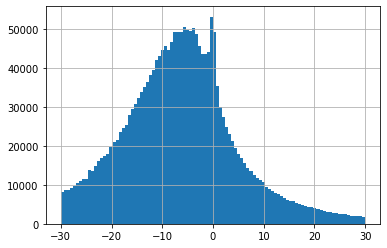

In [104]:
(df_md.buyRet90s*1e4).hist(bins=100,range=(-30,30))

<AxesSubplot:>

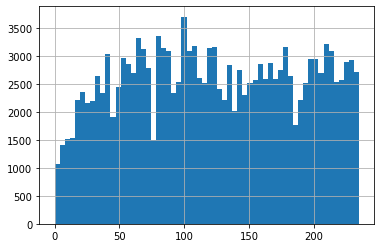

In [110]:
df_md[(df_md.buyRet90s < 1e-4) & (df_md.buyRet90s > -1e-4)].mins_since_open.hist(bins=60)

<AxesSubplot:>

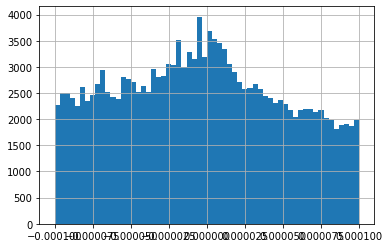

In [112]:
df_md[(df_md.buyRet90s < 1e-4) & (df_md.buyRet90s > -1e-4)].buyRet90s.hist(bins=60)

In [113]:
(df_md.buyRet90s==0).sum()

422

In [135]:
df_md

,skey,date,time,datetime,ordering,ask1p,ask1q,bid1p,bid1q,buyRet90s,sellRet90s,nearLimit,cum_volume,cum_amount,minute,mins_since_open
0,1600006,20200102,93000000000,2020-01-02 09:30:00,97,4.63,26000,4.62,36000,-0.002002,-0.000158,False,45800,2.115960e+05,570,0
1,1600006,20200102,93003000000,2020-01-02 09:30:03,98,4.63,54400,4.62,24400,-0.002525,0.000366,False,122700,5.675410e+05,570,0
2,1600006,20200102,93006000000,2020-01-02 09:30:06,99,4.63,8200,4.62,39700,-0.002761,0.000603,False,167600,7.752720e+05,570,0
3,1600006,20200102,93009000000,2020-01-02 09:30:09,100,4.63,20000,4.62,43600,-0.002974,0.000816,False,169700,7.849740e+05,570,0
4,1600006,20200102,93012000000,2020-01-02 09:30:12,101,4.63,27000,4.62,40000,-0.003051,0.000894,False,173500,8.025300e+05,570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255959,2300529,20200102,145642000000,2020-01-02 14:56:42,4557,70.98,200,70.92,6200,NaN,NaN,False,3794251,2.698897e+08,896,236
2255960,2300529,20200102,145645000000,2020-01-02 14:56:45,4558,70.98,200,70.92,5900,NaN,NaN,False,3794251,2.698897e+08,896,236
2255961,2300529,20200102,145648000000,2020-01-02 14:56:48,4559,70.98,200,70.93,100,NaN,NaN,False,3794251,2.698897e+08,896,236
2255962,2300529,20200102,145651000000,2020-01-02 14:56:51,4560,70.98,200,70.93,100,NaN,NaN,False,3794251,2.698897e+08,896,236


In [50]:
df_sta.shape

(2191658, 5)

In [51]:
df_alpha = df_md.merge(df_sta, on = ['skey','date','ordering'], how = 'left', validate = 'one_to_one')
df_alpha = df_alpha.sort_values(['skey','date','ordering']).reset_index(drop=True)

In [52]:
df_alpha['exchange'] = df_alpha['skey'].map(lambda x:str(x)[:1])
df_alpha['exchange'] = np.where(df_alpha['exchange'] == '1', 'SH', 'SZ')
df_alpha['mins_since_open'] = np.where(df_alpha['time'] <= 11.3e10, df_alpha['time'] - 9.3e10, df_alpha['time'] - 11e10) // 1e8

In [57]:
df_alpha.head()

,skey,date,time,ordering,ask1p,ask1q,bid1p,bid1q,ask5q,bid5q,...,buyRet90s,sellRet90s,curNearLimit_L180s,datetime,nearLimit_L180s_L0,nearLimit,yHatBuy_90_1_1_1_l2,yHatSell_90_1_1_1_l2,exchange,mins_since_open
0,1600006,20200102,93000000000,97,4.63,26000,4.62,36000,12300,53600,...,-0.002002,-0.000158,NaN,2020-01-02 09:30:00,0.0,False,-0.000547,-0.001604,SH,0.0
1,1600006,20200102,93003000000,98,4.63,54400,4.62,24400,25000,56600,...,-0.002525,0.000366,NaN,2020-01-02 09:30:03,0.0,False,-0.001559,-0.000589,SH,0.0
2,1600006,20200102,93006000000,99,4.63,8200,4.62,39700,40000,61600,...,-0.002761,0.000603,NaN,2020-01-02 09:30:06,0.0,False,-0.000918,-0.001234,SH,0.0
3,1600006,20200102,93009000000,100,4.63,20000,4.62,43600,40000,63600,...,-0.002974,0.000816,NaN,2020-01-02 09:30:09,0.0,False,-0.001024,-0.001127,SH,0.0
4,1600006,20200102,93012000000,101,4.63,27000,4.62,40000,40000,63600,...,-0.003051,0.000894,NaN,2020-01-02 09:30:12,0.0,False,-0.001115,-0.001035,SH,0.0


In [763]:
pd.options.display.max_columns =100

In [54]:
df_side = df_alpha[['skey','date','time','mins_since_open','ask1p','ask1q','nearLimit','exchange','cum_volume','cum_amount'] + ['yHatBuy_90_1_1_1_l2'] + [f"buyRet90s"]].copy()

In [55]:
df_side.columns = ['skey','date','time','mins_since_open','price','quantity','nearLimit','exchange','cum_volume','cum_amount'] + ['sta_90_1_1_1_l2'] + [f"actualRet90s"]
df_side['availNtl'] = (df_side['price'] * df_side['quantity'].clip(0, 500000)).clip(0, 500000)

In [56]:
df_side['sta_90_1_1_2_l2'] = df_side['sta_90_1_1_1_l2']

In [599]:
stat_data_all = df_side.groupby(['skey', 'exchange', 'date'])[['sta_90_1_1_1_l2', 'sta_90_1_1_2_l2']].agg([('mean', 'mean'), ('std', 'std'),('skew','skew'),('kurtosis',lambda x: x.kurtosis()),
                                                                        ('75p', lambda x: x.quantile(.75)), ('90p', lambda x: x.quantile(.90)),
                                                                        ('95p', lambda x: x.quantile(.95)), ('99p', lambda x: x.quantile(.99)),
                                                                        ('min', 'min'), ('max', 'max')])

In [80]:
df_side.groupby(['skey', 'exchange', 'date'])[['sta_90_1_1_1_l2', 'sta_90_1_1_2_l2']].agg([('count', 'nunique'), ('std', 'std'),('skew','skew'),('kurtosis',lambda x: x.kurtosis()),
#                                                                         ('75p', lambda x: x.quantile(.75)), ('90p', lambda x: x.quantile(.90)),
#                                                                         ('95p', lambda x: x.quantile(.95)), ('99p', lambda x: x.quantile(.99)),
                                                                        ('min', 'min'), ('max', 'max'),('sum_x', 'sum'), ('count_x', 'count'),
                                                                                           ('sum_x2', lambda x: (x**2).sum())])

sta_90_1_1_1_l2                                \
                                    count       std      skew  kurtosis   
skey    exchange date                                                     
1600006 SH       20200102            4355  0.000747  0.564955  1.421659   
1600008 SH       20200102            4590  0.001106 -0.697489 -0.293224   
1600017 SH       20200102            4072  0.000780 -0.318587 -0.449916   
1600021 SH       20200102            4319  0.000448 -0.090683  0.261903   
1600022 SH       20200102            4710  0.001108  0.434182  3.611650   
...                                   ...       ...       ...       ...   
2300376 SZ       20200102            3256  0.000811  0.112394 -0.047810   
2300383 SZ       20200102            4719  0.000498  0.101320  1.706995   
2300418 SZ       20200102            4728  0.000634  0.153035  2.102958   
2300459 SZ       20200102            4712  0.001410  0.571410  4.039085   
2300529 SZ       20200102            4387  0.000630 -0.829933  3.749775   

                                                                            \
                                min       max      sum_x count_x    sum_x2   
skey    exchange date                                                        
1600006 SH       20200102 -0.004081  0.002281  -5.080138    4356  0.008357   
1600008 SH       20200102 -0.004108  0.000878  -5.028682    4592  0.011124   
1600017 SH       20200102 -0.003527  0.001493  -5.854723    4072  0.010892   
1600021 SH       20200102 -0.002407  0.001158  -2.638822    4319  0.002480   
1600022 SH       20200102 -0.008145  0.002187 -12.372449    4710  0.038284   
...                             ...       ...        ...     ...       ...   
2300376 SZ       20200102 -0.003994  0.001701  -4.300690    3257  0.007820   
2300383 SZ       20200102 -0.002454  0.002269  -1.053771    4720  0.001403   
2300418 SZ       20200102 -0.004332  0.003555  -0.945082    4728  0.002091   
2300459 SZ       20200102 -0.010619  0.008703  -6.497800    4713  0.018326   
2300529 SZ       20200102 -0.006250  0.002368  -2.056252    4387  0.002704   

                          sta_90_1_1_2_l2                                \
                                    count       std      skew  kurtosis   
skey    exchange date                                                     
1600006 SH       20200102            4355  0.000747  0.564955  1.421659   
1600008 SH       20200102            4590  0.001106 -0.697489 -0.293224   
1600017 SH       20200102            4072  0.000780 -0.318587 -0.449916   
1600021 SH       20200102            4319  0.000448 -0.090683  0.261903   
1600022 SH       20200102            4710  0.001108  0.434182  3.611650   
...                                   ...       ...       ...       ...   
2300376 SZ       20200102            3256  0.000811  0.112394 -0.047810   
2300383 SZ       20200102            4719  0.000498  0.101320  1.706995   
2300418 SZ       20200102            4728  0.000634  0.153035  2.102958   
2300459 SZ       20200102            4712  0.001410  0.571410  4.039085   
2300529 SZ       20200102            4387  0.000630 -0.829933  3.749775   

                                                                            
                                min       max      sum_x count_x    sum_x2  
skey    exchange date                                                       
1600006 SH       20200102 -0.004081  0.002281  -5.080138    4356  0.008357  
1600008 SH       20200102 -0.004108  0.000878  -5.028682    4592  0.011124  
1600017 SH       20200102 -0.003527  0.001493  -5.854723    4072  0.010892  
1600021 SH       20200102 -0.002407  0.001158  -2.638822    4319  0.002480  
1600022 SH       20200102 -0.008145  0.002187 -12.372449    4710  0.038284  
...                             ...       ...        ...     ...       ...  
2300376 SZ       20200102 -0.003994  0.001701  -4.300690    3257  0.007820  
2300383 SZ       20200102 -0.002454  0.002269  -1.053771    4

In [60]:
import matplotlib.pyplot as plt

In [79]:
df_side.groupby(['skey', 'exchange', 'date'])[['sta_90_1_1_1_l2', 'sta_90_1_1_2_l2']].agg([('hist', lambda x: pd.cut(x, bins=np.arange(-0.003,0.00305, 0.0001), labels=np.arange(-29.5, 30, 1)).value_counts().to_dict())])

,,,sta_90_1_1_1_l2,sta_90_1_1_2_l2
,,,hist,hist
skey,exchange,date,,
1600006,SH,20200102,"{-14.5: 317, -13.5: 314, -12.5: 312, -15.5: 26...","{-14.5: 317, -13.5: 314, -12.5: 312, -15.5: 26..."
1600008,SH,20200102,"{-4.5: 380, -5.5: 351, -13.5: 250, 1.5: 215, -...","{-4.5: 380, -5.5: 351, -13.5: 250, 1.5: 215, -..."
1600017,SH,20200102,"{-13.5: 305, -11.5: 234, -12.5: 214, -7.5: 204...","{-13.5: 305, -11.5: 234, -12.5: 214, -7.5: 204..."
1600021,SH,20200102,"{-6.5: 452, -5.5: 425, -7.5: 378, -3.5: 317, -...","{-6.5: 452, -5.5: 425, -7.5: 378, -3.5: 317, -..."
1600022,SH,20200102,"{-28.5: 386, -27.5: 384, -26.5: 332, -29.5: 32...","{-28.5: 386, -27.5: 384, -26.5: 332, -29.5: 32..."
...,...,...,...,...
2300376,SZ,20200102,"{-14.5: 160, -15.5: 157, -16.5: 154, -11.5: 14...","{-14.5: 160, -15.5: 157, -16.5: 154, -11.5: 14..."
2300383,SZ,20200102,"{-1.5: 505, -2.5: 426, -0.5: 415, -3.5: 384, 0...","{-1.5: 505, -2.5: 426, -0.5: 415, -3.5: 384, 0..."


In [68]:
(-0.003 + -0.003 + 0.0001)/2

-0.00295

<AxesSubplot:>

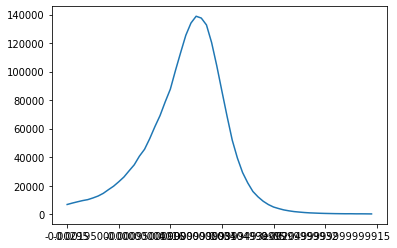

In [74]:
pd.cut(df_side['sta_90_1_1_2_l2'], bins=np.arange(-0.003,0.00305, 0.0001), labels=np.arange(-0.00295, 0.003, 0.0001)).value_counts().sort_index().plot()

In [716]:
stat_data_all.columns.names = ["sta_cat", ""]

In [717]:
stat_data_all = stat_data_all.stack("sta_cat").reset_index()

In [596]:
df_side.head()

,skey,date,time,mins_since_open,price,quantity,nearLimit,exchange,cum_volume,cum_amount,sta_90_1_1_1_l2,actualRet90s,availNtl,sta_90_1_1_2_l2
0,1600006,20200102,93000000000,0.0,4.63,26000,False,SH,45800,211596.0,-0.000547,-0.003357,120380.0,-0.000547
1,1600006,20200102,93003000000,0.0,4.63,54400,False,SH,122700,567541.0,-0.001559,-0.003357,251872.0,-0.001559
2,1600006,20200102,93006000000,0.0,4.63,8200,False,SH,167600,775272.0,-0.000918,-0.003357,37966.0,-0.000918
3,1600006,20200102,93009000000,0.0,4.63,20000,False,SH,169700,784974.0,-0.001024,-0.003357,92600.0,-0.001024
4,1600006,20200102,93012000000,0.0,4.63,27000,False,SH,173500,802530.0,-0.001115,-0.001413,125010.0,-0.001115


In [601]:
basic_cols = ['skey','date','time','exchange','mins_since_open',
                          'nearLimit','cum_volume','cum_amount']

In [605]:
df_side = df_side.melt(id_vars=basic_cols + ['availNtl', f"actualRet90s"], value_vars=['sta_90_1_1_1_l2', 'sta_90_1_1_2_l2'], 
                                       var_name="sta_cat", value_name='sta')

In [606]:
df_side

,skey,date,time,exchange,mins_since_open,nearLimit,cum_volume,cum_amount,availNtl,actualRet90s,sta_cat,sta
0,1600006,20200102,93000000000,SH,0.0,False,45800,2.115960e+05,120380.0,-0.003357,sta_90_1_1_1_l2,-0.000547
1,1600006,20200102,93003000000,SH,0.0,False,122700,5.675410e+05,251872.0,-0.003357,sta_90_1_1_1_l2,-0.001559
2,1600006,20200102,93006000000,SH,0.0,False,167600,7.752720e+05,37966.0,-0.003357,sta_90_1_1_1_l2,-0.000918
3,1600006,20200102,93009000000,SH,0.0,False,169700,7.849740e+05,92600.0,-0.003357,sta_90_1_1_1_l2,-0.001024
4,1600006,20200102,93012000000,SH,0.0,False,173500,8.025300e+05,125010.0,-0.001413,sta_90_1_1_1_l2,-0.001115
...,...,...,...,...,...,...,...,...,...,...,...,...
4511923,2300529,20200102,145642000000,SZ,356.0,False,3794251,2.698897e+08,14196.0,NaN,sta_90_1_1_2_l2,-0.000296
4511924,2300529,20200102,145645000000,SZ,356.0,False,3794251,2.698897e+08,14196.0,NaN,sta_90_1_1_2_l2,-0.000300
4511925,2300529,20200102,145648000000,SZ,356.0,False,3794251,2.698897e+08,14196.0,NaN,sta_90_1_1_2_l2,-0.000496
4511926,2300529,20200102,145651000000,SZ,356.0,False,3794251,2.698897e+08,14196.0,NaN,sta_90_1_1_2_l2,-0.000374


In [746]:
def interval_filter(df, min_time=None, min_volume=None):
    """
    filter out consecutive opportunities if the arrival time of the opportunities are too close

    df should have columns time and cum_volume
    """
    records = df.to_records(index=False)
    remaining = [records[0]]

    volume_cond = True
    time_cond = True

    for oppo in records:
        if min_volume is not None:
            volume_cond = (oppo.cum_volume - remaining[-1].cum_volume > min_volume)

        if min_time is not None:
            time_cond = (abs((oppo.time - remaining[-1].time) / 1e6) > min_time)

        if volume_cond and time_cond:
            remaining.append(oppo)

    return pd.DataFrame(np.array(remaining))


def find_top_percent(df, col, target_number, total_number, min_time=1, min_volume=None, 
                     tolerance=0.01, termination=10):
    """
    find out the top x percent opportunities so that there are target number of opportunities remaining after filtering
    """
    target_number = math.ceil(target_number * (1 - (df.loc[df[col].isna() | df['nearLimit'], 'time']//1e6).nunique() / total_number))
    df_valid = df[df[col].notna() & ~df['nearLimit']]

    if (target_number < 50) or (len(df_valid) < 50):
        return None
    ratio = target_number / len(df_valid)
    for _ in range(termination):
        oppo_index = df_valid.index[df_valid[col] > df_valid[col].quantile(1 - ratio)]
        oppo = interval_filter(df_valid.loc[oppo_index], min_time, min_volume)

        if abs(len(oppo) - target_number) < tolerance * target_number:
            break
        
        # update the estimation of the filter rate
        filter_rate = len(oppo) / len(oppo_index)
        # update the ratio
        ratio = target_number / filter_rate / len(df_valid)
    
    return oppo

In [747]:
tmp = df_side.groupby(['skey', 'exchange', 'date', 'sta_cat']).apply(lambda x: find_top_percent(x, col="sta", target_number=240, total_number=4800)).reset_index(drop=True)

In [754]:
tmp

,skey,date,time,exchange,mins_since_open,nearLimit,cum_volume,cum_amount,availNtl,actualRet90s,sta_cat,sta
0,1600006,20200102,93237000000,SH,2.0,False,483800,2.235896e+06,2305.0,0.003730,sta_90_1_1_1_l2,0.000489
1,1600006,20200102,93246000000,SH,2.0,False,484500,2.239123e+06,45178.0,0.003363,sta_90_1_1_1_l2,0.000263
2,1600006,20200102,93301000000,SH,3.0,False,581400,2.686703e+06,402347.0,-0.000855,sta_90_1_1_1_l2,0.000897
3,1600006,20200102,93304000000,SH,3.0,False,607300,2.806370e+06,403273.0,-0.000855,sta_90_1_1_1_l2,0.000662
4,1600006,20200102,93307000000,SH,3.0,False,647500,2.992474e+06,227333.0,-0.000855,sta_90_1_1_1_l2,0.001627
...,...,...,...,...,...,...,...,...,...,...,...,...
232633,2300529,20200102,145536000000,SZ,355.0,False,3781851,2.690103e+08,78089.0,-0.000218,sta_90_1_1_2_l2,0.000550
232634,2300529,20200102,145539000000,SZ,355.0,False,3782151,2.690316e+08,7094.0,0.000488,sta_90_1_1_2_l2,0.000980
232635,2300529,20200102,145542000000,SZ,355.0,False,3782451,2.690529e+08,106485.0,-0.000166,sta_90_1_1_2_l2,0.000553
232636,2300529,20200102,145600000000,SZ,356.0,False,3783051,2.690955e+08,7092.0,NaN,sta_90_1_1_2_l2,0.001141


In [750]:
tmp.skey.nunique()

498

In [748]:
kkk = tmp.groupby(['skey', 'sta_cat'])['skey'].count()

In [751]:
kkk[kkk <100]

skey     sta_cat        
1601608  sta_90_1_1_1_l2    84
         sta_90_1_1_2_l2    84
2002503  sta_90_1_1_1_l2    53
         sta_90_1_1_2_l2    53
Name: skey, dtype: int64

In [672]:
240 * 1 - (df_side[(df_side.skey==1600053) & ((df_side.sta.isna()) | df_side.nearLimit)].time // 1e6 ).nunique() / 4800

239.37354166666665

In [674]:
df_side[(df_side.skey==1600053) & ~df_side.nearLimit]

,skey,date,time,exchange,mins_since_open,nearLimit,cum_volume,cum_amount,availNtl,actualRet90s,sta_cat,sta


In [587]:
(df_side.loc[df_side.sta_90_1_1_1_l2.notna() & ~df_side.nearLimit, 'time']//1e6).nunique()

14214

In [590]:
12000 / 14214 * 240

202.6171380329253

In [676]:
find_top_percent(df_side[(df_side.skey==1600053) & (df_side.sta_cat=='sta_90_1_1_1_l2')], col="sta", target_number=240, total_number=4800)

,index,skey,date,time,exchange,mins_since_open,nearLimit,cum_volume,cum_amount,availNtl,actualRet90s,sta_cat,sta
0,36797,1600053,20200102,93047000000,SH,0.0,True,208100,5820557.0,0.0,NaN,sta_90_1_1_1_l2,0.007465


In [684]:
240 * (1 - (df_side.loc[(df_side.skey==1600053) & (df_side.sta_cat=='sta_90_1_1_1_l2') & (df_side['sta'].isna() | df_side['nearLimit']), 'time']//1e6).nunique() / 4800)

89.65

In [711]:
k = (tmp.groupby(['skey', 'exchange', 
                                                     'date', 'sta_cat'])[['sta', 'availNtl',f"actualRet90s"]]
                                            .agg(yHatAvg=('sta', 'mean'), 
                                                 countOppo=('sta', 'count'),
                                                 availNtlAvg=('availNtl', 'mean'),
                                                 yHatHurdle=('sta', 'min'),
                                                 actualRetAvg=(f"actualRet90s", 'mean')))

In [707]:
def weighted_average(values, weights):
    indices = ~np.isnan(values)
    return np.average(values[indices], weights=weights[indices])

In [712]:
k['vwActualRetAvg'] = tmp.groupby(['skey', 'exchange', 'date', 'sta_cat']).apply(lambda x: weighted_average(x["actualRet90s"],weights=x['availNtl']))

In [714]:
k.reset_index()

,skey,exchange,date,sta_cat,yHatAvg,countOppo,availNtlAvg,yHatHurdle,actualRetAvg,vwActualRetAvg
0,1600006,SH,20200102,sta_90_1_1_1_l2,0.000661,232,221334.308017,0.000119,-0.000179,-0.000210
1,1600006,SH,20200102,sta_90_1_1_2_l2,0.000661,232,221334.308017,0.000119,-0.000179,-0.000210
2,1600008,SH,20200102,sta_90_1_1_1_l2,0.000485,232,94008.451121,0.000316,-0.000107,-0.000121
3,1600008,SH,20200102,sta_90_1_1_2_l2,0.000485,232,94008.451121,0.000316,-0.000107,-0.000121
4,1600017,SH,20200102,sta_90_1_1_1_l2,-0.000141,231,470133.008658,-0.000377,-0.000430,-0.000439
...,...,...,...,...,...,...,...,...,...,...
987,2300418,SZ,20200102,sta_90_1_1_2_l2,0.001279,232,179101.499397,0.000831,0.001340,0.001780
988,2300459,SZ,20200102,sta_90_1_1_1_l2,0.002131,232,358134.830043,0.001032,0.000843,0.001070
989,2300459,SZ,20200102,sta_90_1_1_2_l2,0.002131,232,358134.830043,0.001032,0.000843,0.001070
990,2300529,SZ,20200102,sta_90_1_1_1_l2,0.000687,232,96857.500000,0.000403,0.000271,0.000337


In [719]:
pd.merge(stat_data_all,k, on=['skey', 'exchange', 'date', 'sta_cat'], how='left')

,skey,exchange,date,sta_cat,75p,90p,95p,99p,kurtosis,max,mean,min,skew,std,yHatAvg,countOppo,availNtlAvg,yHatHurdle,actualRetAvg,vwActualRetAvg
0,1600006,SH,20200102,sta_90_1_1_1_l2,-0.000774,-0.000222,0.000161,0.001032,1.421659,0.002281,-0.001166,-0.004081,0.564955,0.000747,0.000661,232.0,221334.308017,0.000119,-0.000179,-0.000210
1,1600006,SH,20200102,sta_90_1_1_2_l2,-0.000774,-0.000222,0.000161,0.001032,1.421659,0.002281,-0.001166,-0.004081,0.564955,0.000747,0.000661,232.0,221334.308017,0.000119,-0.000179,-0.000210
2,1600008,SH,20200102,sta_90_1_1_1_l2,-0.000299,0.000188,0.000321,0.000608,-0.293224,0.000878,-0.001095,-0.004108,-0.697489,0.001106,0.000485,232.0,94008.451121,0.000316,-0.000107,-0.000121
3,1600008,SH,20200102,sta_90_1_1_2_l2,-0.000299,0.000188,0.000321,0.000608,-0.293224,0.000878,-0.001095,-0.004108,-0.697489,0.001106,0.000485,232.0,94008.451121,0.000316,-0.000107,-0.000121
4,1600017,SH,20200102,sta_90_1_1_1_l2,-0.000831,-0.000500,-0.000357,0.000067,-0.449916,0.001493,-0.001438,-0.003527,-0.318587,0.000780,-0.000141,231.0,470133.008658,-0.000377,-0.000430,-0.000439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2300418,SZ,20200102,sta_90_1_1_2_l2,0.000155,0.000559,0.000826,0.001526,2.102958,0.003555,-0.000200,-0.004332,0.153035,0.000634,0.001279,232.0,179101.499397,0.000831,0.001340,0.001780
996,2300459,SZ,20200102,sta_90_1_1_1_l2,-0.000718,0.000293,0.001024,0.002534,4.039085,0.008703,-0.001379,-0.010619,0.571410,0.001410,0.002131,232.0,358134.830043,0.001032,0.000843,0.001070
997,2300459,SZ,20200102,sta_90_1_1_2_l2,-0.000718,0.000293,0.001024,0.002534,4.039085,0.008703,-0.001379,-0.010619,0.571410,0.001410,0.002131,232.0,358134.830043,0.001032,0.000843,0.001070
998,2300529,SZ,20200102,sta_90_1_1_1_l2,-0.000067,0.000217,0.000420,0.000829,3.749775,0.002368,-0.000469,-0.006250,-0.829933,0.000630,0.000687,232.0,96857.500000,0.000403,0.000271,0.000337


In [752]:
import os

In [753]:
os.path.join('/data/home/marlowe/Marlowe/sta_eval', 'IC', 'top5p')

'/data/home/marlowe/Marlowe/sta_eval/IC/top5p'

In [814]:
tmp = a.Read_Stock_Tick('com_md_eq_cn', 'md_snapshot_mbd', 20200102, 20200102, stock_list=[2000001])

In [818]:
tmp.clockAtArrival.iloc[0]

1577928300000000.0

In [820]:
tmp.shape

(113623, 88)

In [824]:
tmp = c.read_file('/sta_md_eq_cn/sta_ret_l2/IC/ret20200102.parquet', 'sta_md_eq_cn', 'sta_ret_l2').dropna()

In [828]:
tmp[(tmp.skey==2000006) & (tmp.ordering >=81)].head(10)

,skey,date,ordering,passFilter,buyRet90s,sellRet90s,buyRet300s,sellRet300s,buyRet600s,sellRet600s
1283324,2000006,20200102,81,False,-0.007732,0.005939,0.000455,-0.002292,-0.004447,0.002620
1283325,2000006,20200102,82,True,-0.005878,0.000365,0.000635,-0.006145,-0.004481,-0.001038
1283326,2000006,20200102,83,True,-0.004334,0.002504,0.002543,-0.004373,-0.002710,0.000871
1283327,2000006,20200102,84,True,-0.006277,0.002617,0.000878,-0.004551,-0.004545,0.000872
1283328,2000006,20200102,85,True,-0.003676,0.001841,0.002840,-0.004668,-0.002714,0.000875
1283329,2000006,20200102,86,True,-0.006559,0.002902,0.001551,-0.005219,-0.006318,0.002658
1283330,2000006,20200102,87,True,-0.004682,0.002854,0.003513,-0.005336,-0.004615,0.002786
1283331,2000006,20200102,88,True,-0.003766,0.001932,0.003457,-0.005280,-0.004645,0.002817
1283332,2000006,20200102,89,True,-0.004240,0.002408,0.003542,-0.005365,-0.004575,0.002746
1283333,2000006,20200102,90,True,-0.002454,0.000611,0.005344,-0.007151,-0.002798,0.000956


In [47]:
tmp2 = c.read_file('/sta_md_eq_cn/sta_ret_l2/IC/ret20200120.parquet', 'sta_md_eq_cn', 'sta_ret_l2').dropna()

In [53]:
# tmp2[(tmp2.skey==2000980) & (tmp2.ordering>=4100)].head(50)

In [7]:
tmp = reader.Read_Stock_Tick('com_md_eq_cn', 'md_snapshot_mbd',20200102, 20200102, stock_list=[2000001])

In [836]:
tmp.time.astype(int).astype(str).str.zfill(12).apply(lambda x: x[:2] + ":" + x[2:4] + ":" + x[4:6])

0         09:25:00
1         09:30:00
2         09:30:00
3         09:30:00
4         09:30:00
            ...   
113618    14:56:59
113619    14:56:59
113620    14:56:59
113621    14:57:00
113622    15:00:00
Name: time, Length: 113623, dtype: object

In [11]:
(tmp.time // 1e6).nunique()

14065

In [16]:
k = tmp.groupby(['skey', 'date']).apply(lambda x: x['cum_volume'].mean())

In [19]:
k.name = 'a'

In [21]:
k.reset_index()

,skey,date,a
0,2000001,20200102,8.937289e+07


In [38]:
pd.read_pickle('/home/marlowe/Marlowe/sta_eval/IC/sta_90_1_1_1_mbd/sta_top5p/intraday/df_top5p_20200120.pkl')

,date,exchange,side,sta_cat,mins_since_open,countOppo,availNtlSum,vwActualRetAvg
0,20200120,SZ,buy,sta_90_1_1_1_l2,0,1198,1.651065e+08,0.001167
1,20200120,SZ,buy,sta_90_1_1_1_l2,1,735,1.161609e+08,-0.000400
2,20200120,SZ,buy,sta_90_1_1_1_l2,2,924,2.026690e+08,0.001265
3,20200120,SZ,buy,sta_90_1_1_1_l2,3,1100,2.233957e+08,-0.001287
4,20200120,SZ,buy,sta_90_1_1_1_l2,4,731,1.403196e+08,-0.000465
...,...,...,...,...,...,...,...,...
935,20200120,SZ,sell,sta_90_1_1_1_mbd,231,207,5.667992e+07,-0.000080
936,20200120,SZ,sell,sta_90_1_1_1_mbd,232,237,6.430239e+07,-0.000682
937,20200120,SZ,sell,sta_90_1_1_1_mbd,233,273,5.993848e+07,-0.000702
938,20200120,SZ,sell,sta_90_1_1_1_mbd,234,259,5.550252e+07,-0.000034


In [36]:
reader.Read_Stock_Tick('com_md_eq_cn', 'md_snapshot_l2', 20200203, 20200203, stock_list=[2000009]).bid1p.describe()

count    4283.000000
mean        0.984947
std         2.191368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.990000
Name: bid1p, dtype: float64

In [118]:
sta = 'sta_90_1_1_1_mbd'
date = 20200203

In [119]:
tmp = writer.read_file(f"/sta_alpha_eq_cn/{sta}/IC/sta{date}.parquet", "sta_alpha_eq_cn", sta)

In [121]:
tmp.head()

,skey,date,ordering,yHatBuy,yHatSell
0,2000006,20200203,2.0,-0.007223,-0.002803
1,2000006,20200203,3.0,-0.007291,-0.002736
2,2000006,20200203,4.0,-0.007376,-0.002653
3,2000006,20200203,5.0,-0.007376,-0.002653
4,2000006,20200203,6.0,-0.007375,-0.002654


In [ ]:
reader.Read_Stock_Tick('com_m')

In [82]:
data = c.read_file("/sta_md_eq_cn/sta_ret_l2/IC/ret20200102.parquet", 'sta_md_eq_cn', 'sta_ret_l2')

<AxesSubplot:>

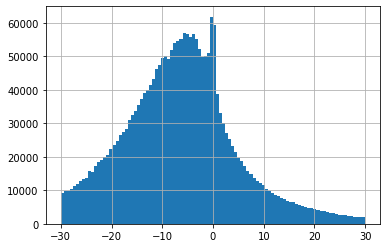

In [86]:
(data.buyRet90s * 1e4).hist(bins=100,range=(-30, 30))

In [92]:
data[data.buyRet90s==0].ordering.describe()

count    6462.000000
mean     4408.221448
std       768.558417
min       106.000000
25%      4267.000000
50%      4665.000000
75%      4857.000000
max      5076.000000
Name: ordering, dtype: float64

In [91]:
a.Read_Stock_Tick('com_md_eq_cn', 'md_snapshot_l2', 20200102, 20200102, stock_list=[1600006]).loc[4519:4549, ['time', 'ordering','bid1p', 'bid1q', 'ask1p', 'ask1q']]

,time,ordering,bid1p,bid1q,ask1p,ask1q
4519,145550000000,4520,4.65,99800,4.66,818569
4520,145553000000,4521,4.65,119600,4.66,813569
4521,145556000000,4522,4.65,139600,4.66,817869
4522,145559000000,4523,4.65,332500,4.66,817869
4523,145602000000,4524,4.65,333600,4.66,817869
4524,145606000000,4525,4.65,334700,4.66,816869
4525,145609000000,4526,4.65,330900,4.66,786469
4526,145611000000,4527,4.65,147600,4.66,786169
4527,145614000000,4528,4.65,161600,4.66,783769
4528,145617000000,4529,4.65,127300,4.66,783969


In [203]:
tmp = pd.read_csv("/home/marlowe/Marlowe/HPC/Maya/vendor_to_save.csv")

In [204]:
tmp[tmp.source=='record'].groupby('exchange').date.max()

exchange
CFFEX    20210820
CZCE     20210820
DCE      20210820
INE      20210820
SHFE     20210820
Name: date, dtype: int64

In [205]:
len(tmp[tmp.source=='record'])

20044

In [206]:
taskTuples = list(tmp[tmp.source=='record'][["exchange", "date", "contract", "source"]].itertuples(index=None, name=None))

In [ ]:
exchange, date, skey, _ = taskTuples[0]
c.read_file(f"/com_md_ft_cn/md_snapshot_l2/{date}/{exchange}/{skey}.parquet", 'md_snapshot_l2', 'com_md_ft_cn')

In [184]:
# c.list_files('/com_md_ft_cn/md_snapshot_l2_record/', 'com_md_ft_cn', 'md_snapshot_l2_record')

In [15]:
tmp = c.read_file('/com_md_ft_cn/md_snapshot_l2_record/CFFEX/20210712/ic2107.parquet', 'com_md_ft_cn', 'md_snapshot_l2_record')

In [16]:
tmp

,skey,exchange,tradedate,date,time,clockAtExchange,ordering,session,cum_volume,cum_amount,...,bid4q,bid3q,bid2q,bid1q,ask1q,ask2q,ask3q,ask4q,ask5q,open_interest
0,ic2107,CFFEX,20210712,20210712,92900300000,1626053340300000,1,0,231,3.145111e+08,...,4,1,5,4,20,2,20,26,5,84748
1,ic2107,CFFEX,20210712,20210712,93000300000,1626053400300000,2,2,313,4.261810e+08,...,1,1,1,1,2,21,20,3,20,84710
2,ic2107,CFFEX,20210712,20210712,93000800000,1626053400800000,3,2,437,5.951071e+08,...,1,2,1,5,20,21,1,1,20,84610
3,ic2107,CFFEX,20210712,20210712,93001300000,1626053401300000,4,2,518,7.054983e+08,...,3,1,7,2,3,1,1,20,20,84556
4,ic2107,CFFEX,20210712,20210712,93001800000,1626053401800000,5,2,580,7.900068e+08,...,2,9,4,1,14,20,20,1,20,84509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26662,ic2107,CFFEX,20210712,20210712,145958300000,1626073198300000,26663,4,60794,8.342873e+10,...,5,2,10,3,3,20,3,6,7,75757
26663,ic2107,CFFEX,20210712,20210712,145958800000,1626073198800000,26664,4,60798,8.343422e+10,...,2,10,1,1,1,2,20,3,6,75759
26664,ic2107,CFFEX,20210712,20210712,145959300000,1626073199300000,26665,4,60799,8.343560e+10,...,10,2,1,1,4,20,3,6,6,75760
26665,ic2107,CFFEX,20210712,20210712,145959800000,1626073199800000,26666,4,60799,8.343560e+10,...,2,1,1,1,4,20,3,6,6,75760


In [31]:
c.read_file('/com_md_ft_cn/md_snapshot_l2/20210512/SHFE/ag2109.parquet', 'com_md_ft_cn', 'md_snapshot_l2')

,date,time,clockAtExchange,ordering,session,cum_volume,cum_amount,prev_close,open,high,...,bid5q,ask1q,ask2q,ask3q,ask4q,ask5q,open_interest,prev_open_interest,settle,prev_settle
0,20210511,205900500000,1620737940500000,1,0,0,0.000000e+00,5689.0,0.0,0.0,...,140,3,8,40,50,100,23161,23161,0.0,5717.0
1,20210511,210000500000,1620738000500000,2,1,1,8.490000e+04,5689.0,5660.0,5660.0,...,1,2,3,8,4,3,23161,23161,0.0,5717.0
2,20210511,210001000000,1620738001000000,3,1,5,4.245000e+05,5689.0,5660.0,5660.0,...,8,5,4,3,1,2,23160,23161,0.0,5717.0
3,20210511,210001500000,1620738001500000,4,1,15,1.273980e+06,5689.0,5660.0,5670.0,...,8,3,4,4,3,1,23155,23161,0.0,5717.0
4,20210511,210002000000,1620738002000000,5,1,20,1.699005e+06,5689.0,5660.0,5670.0,...,3,13,8,7,4,4,23159,23161,0.0,5717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43250,20210512,145955500000,1620802795500000,43251,4,15838,1.354055e+09,5689.0,5660.0,5742.0,...,1,1,3,1,15,2,24348,23161,0.0,5717.0
43251,20210512,145956000000,1620802796000000,43252,4,15838,1.354055e+09,5689.0,5660.0,5742.0,...,1,4,1,15,2,3,24348,23161,0.0,5717.0
43252,20210512,145956500000,1620802796500000,43253,4,15838,1.354055e+09,5689.0,5660.0,5742.0,...,1,5,1,15,2,3,24348,23161,0.0,5717.0
43253,20210512,145957500000,1620802797500000,43254,4,15838,1.354055e+09,5689.0,5660.0,5742.0,...,1,4,1,15,2,3,24348,23161,0.0,5717.0
